<a href="https://www.kaggle.com/code/jhonsgomez/notebook-thelogiclegends?scriptVersionId=152164214" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Modelo de segmentacion de imagenes (The LogicLegends)**

Este modelo representa la entrega del reto 1 para la hackathon Geo2Code, cuyo proposito general será segmentar imágenes usando el lenguaje de programacion Python, asimismo este modelo se basa en la arquitectura de red neuronal U-Net, donde el objetivo es dividir una imagen en regiones específicas o segmentos que constan de una estructura en forma de U, que incluye una ruta de contracción (downsampling) para capturar características y una ruta de expansión (upsampling) para generar la salida segmentada.


Para la implementacion de nuestro modelo, se recomienda seguir **AL PIE DE LA LETRA** cada uno de los siguientes pasos:

1. **PASO 1**: Preparacion del dataset para el modelo.
2. **PASO 2**: Entrenamiento del modelo.
3. **PASO 3**: ¿Como realizar pruebas a nuestro modelo?


**ESTRUCTURA DE DIRECTORIOS GLOBLAL DE NUESTRO MODELO**

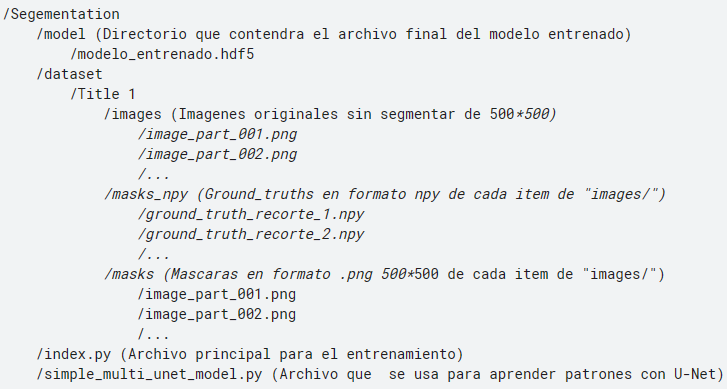

**Descargar proyecto del repositorio**: [segementacion_imagenes](https://github.com/baldion7/segmentacion_imagenes)

**NOTA**: Se recomienda uilizar una version de python inferior a la 3.12.X

(**OBLIGATORIO**) Instalar las librerias correspondientes en el siguiente orden:

* pip install tensorflow
* pip install keras
* pip install scikit-learn
* pip install opencv-python
* pip install numpy
* pip install matplotlib
* pip install patchify
* pip install pillow
* pip install segmentation-models
* pip install scikit-learn
* pip install opencv-python-headless

**NOTA**: Se requiere reinstalar la libreria "keras" debido a un modulo interno predeterminado llamado "efficientnet" que es incompatible con la version actual de keras.

* pip uninstall keras
* pip uninstall efficientnet
* pip install keras
* pip install efficientnet

**PASO 1**: Preparacion del dataset para nuestro modelo:

Como es de saberse la estructura del dataset proporcionado es la siguiente:

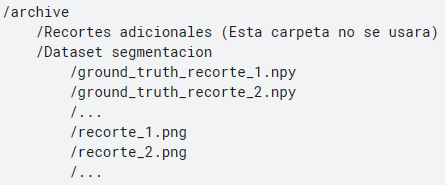

El objetivo de este paso sera primero obtener las mascaras en formato png y con el mismo formato de nombre que se presento en la estructura global, para ello se debe hacer lo siguiente:

1. Mover todos los archivos "ground_truth_X.npy" del dataset proporcionado a la carpeta "masks_npy/" de nuestro modelo.
2. Mover todos los archivos "recorte_X.png" del dataset proporcionado a la carpeta "images/" de nuestro modelo.
3. Abrir y ejecutar el archivo "connvert_masks.py" que se encargará de generar las mascaras en png a partir de los archivos npy, luego guaradará los archivos en la carpeta correspondiente y despues los renombrara con el formato requerido.
4. Abrir y ejecutar el archivo "change_images_name.py" que se encargará de renombrar las imagenes con el formato mostrado en la imagen de la estructura global de directorios.

**PASO 2**: Entrenamiento de nuestro modelo:

Una vez de asegurar que el paso anterior se realizo completamente, se procede a realizar la ejecucion de bloque que ejerce el entrenamiento de nuestro modelo, aqui entran algunos aspector importantes como los procesos que se realizan en dicho entrenamiento los cuales on los siguientes:

1. Recorrer las carpetas de "images/" y "masks/" cuyas resoluciones se saben que son 500*500 en cada elemento, a lo cual nuestro modelo se encargara de parchar cada imagen en fragmentos de 256*256 para asi generar una mayor precision con objetos pequeños y por ultimo crear un array de masks y uno de images respectivamente.
2. Seleccionar aleatoriamente una muestra de los dos arrays para mostrar y comparar la precision de dataset proporcionado.

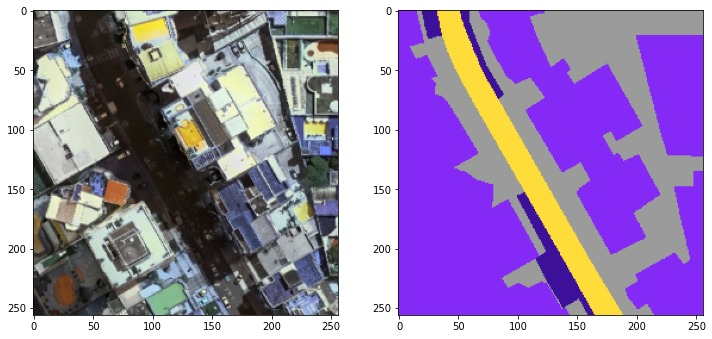

3. Crear y asignar los labels de segementacion y sus repectivos colores:
    * **Area sin etiquta**r: (Unlabeled) -> rgb(155, 155, 155)
    * **Area caminable**: (Passable_Area) -> rgb(60, 16, 152)
    * **Area construida**: (Built_Area) -> rgb(132, 41, 246)
    * **Zonas verdes**: (Green_Area) -> rgb(110, 193, 228)
    * **Carreteras**: (Road) -> rgb(254, 221, 58)
4. Identificar cada label en el array de mascaras para asignarle el correpondiente value (0, 1, 2, 3, 4), generando un total de 5 etiquetas por cada imagen y luego mostrar una por pantalla aleatoriamente.

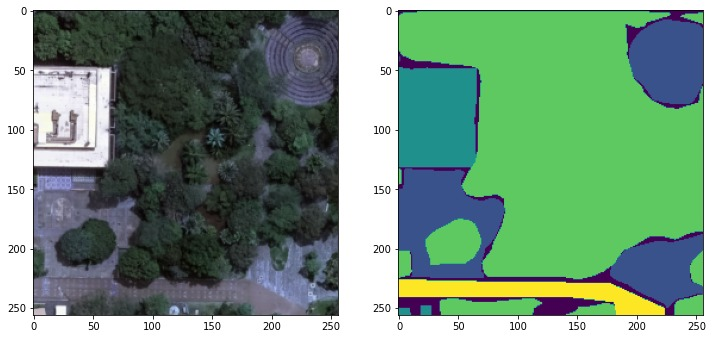

5. Convertir etiquetas de clases en su representación one-hot encoding para crear su clasificacion.
6. Supervicion del entrenamiento basado en los siguientes criterios:
    * **X_train**: Conjunto de entrenamiento de características (imágenes).
    * **X_test**: Conjunto de prueba de características (imágenes).
    * **y_train**: Conjunto de entrenamiento de etiquetas (objetivos).
    * **y_test**: Conjunto de prueba de etiquetas (objetivos).
7. Asignacion de pesos en funciones de perdida siguiendo el coeficiente DICE.
8. Obtencion y grabado del modelo en la carpeta "model/" con el nombre "modelo_entrenado.hdf5".
9. Visualizacion de la evolución del rendimiento del modelo durante el entrenamiento en función del número de épocas.

    Gráfico de Pérdida (Loss):

    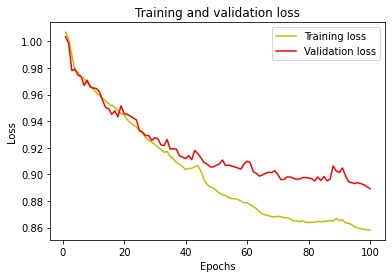

    * El eje x representa las épocas del entrenamiento.
    * El eje y representa el valor de la función de pérdida.
    * La línea amarilla muestra la pérdida durante el entrenamiento (Training loss).
    * La línea roja muestra la pérdida durante la validación (Validation loss).

    Gráfico de Índice de Jaccard (IoU):

    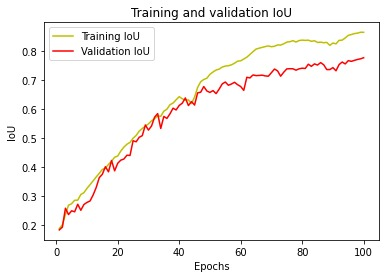

    * El eje x representa las épocas del entrenamiento.
    * El eje y representa el valor del Índice de Jaccard (IoU).
    * La línea amarilla muestra el IoU durante el entrenamiento (Training IoU).
    * La línea roja muestra el IoU durante la validación (Validation IoU).

**PASO 3**: Pruebas sobre nuestro modelo:

Ahora se procede a la carga del modelo generado para testear la prediccion despues del entrenamiento (Recordando que nuestro modelo pecisa segmentos y parches de 256*256 al final dichos segmentos son unidos para mostrar la prediccion de la imagen proporcionada):

Para realizar pruebas sobre nuestro modelo y segmentar una imagen dada se debe realizar lo siguiente:

1. Tener una imagen de dimensiones 500*500.
2. Con la ruta de la imagen anterior, abrir el archivo llamado "probe_model.py".
3. Reemplazar la ruta con la imagen que se desea probar en la suiguiente linea:
    * cv2.imread('RUTA_DE_LA_IMAGEN', 1)
4. Ejecutar el script.
5. Visualizar y comparar los resultados obtenidos por el modelo.

**MEDIA DEL INDICE IOU DE NUESTRO MODELO**: 0.70679677

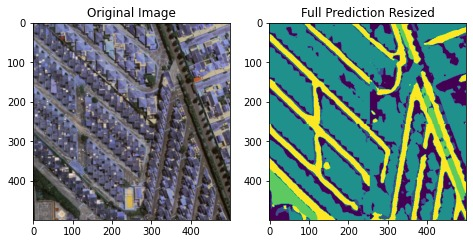

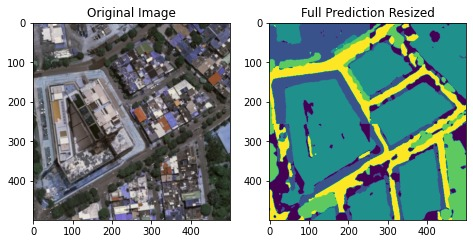

**Recursos y material usado**:

* http://alojamientos.us.es/gtocoma/pid/tema4.pdf
* https://www.youtube.com/watch?v=GvFmlQH_9zY
* https://www.youtube.com/watch?v=3v7sYqigeSc
* https://youtu.be/jvZm8REF2KY?si=FxVZzHeQWWlD2Qo0